Questions:

How to best organize our different modeling techniques?

What form should it be in at the end for ensemble for final model validation?

To Do?:

*** Visualization of features such as frequency of punctuations of spam vs ham, bar graph or scatter plot, etc.*** (Mainly for CRISP-DM presentation i.e. trying back to business)

Punctuation (apostrophe, dashes, underscore, equal sign, plus) removal

Add flags for keywords (Free, deal, bonus, prize, win, http(s), .com, .net, etc)

API call for blacklisted url (validate python package?) (snyk.io)

In [1]:
import pandas as pd
import spacy
import string
import re
import spacy.cli
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
spacy.cli.download("en_core_web_lg")

nlp = spacy.load('en_core_web_lg')
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Loading dataset from github to pandas as df
url = 'https://raw.githubusercontent.com/ElsieElsevier/BIAI/refs/heads/main/SPAM%20text%20message%2020170820%20-%20Data.csv'
df_raw = pd.read_csv(url, encoding='ISO-8859-1')

# Creating numeric categories of ham and spam to 0's and 1's by mapping
df_raw.columns = ['label', 'message']


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text


df_raw['cleaned_message'] = df_raw['message'].apply(clean_text)
# Apply the enhanced feature extraction to your dataset


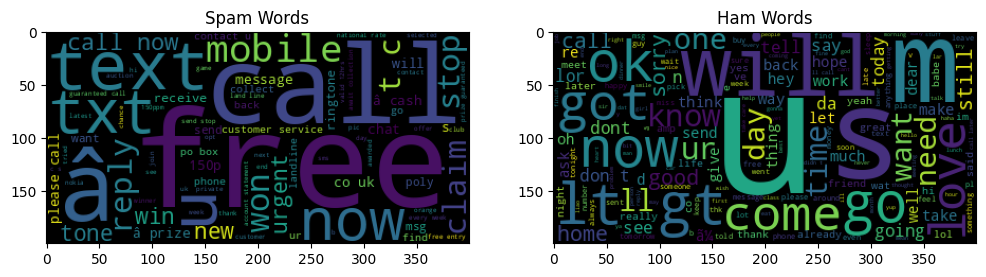

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_words = ' '.join(df_raw[df_raw['label'] == 'spam']['cleaned_message'])
ham_words = ' '.join(df_raw[df_raw['label'] == 'ham']['cleaned_message'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Spam Words')
plt.imshow(WordCloud().generate(spam_words))

plt.subplot(1, 2, 2)
plt.title('Ham Words')
plt.imshow(WordCloud().generate(ham_words))
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# Using Bag-Of-Words Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_raw['cleaned_message'])
y = df_raw['label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [7]:


y_pred = model.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[966   0]
 [ 39 110]]
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



In [11]:
from gensim import corpora
from gensim.models import LdaModel

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(df_raw['cleaned_message'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(text.split()) for text in df_raw['cleaned_message']]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=6, id2word=dictionary, passes=15)

for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.027*"u" + 0.024*"i" + 0.016*"call" + 0.015*"me" + 0.015*"in" + 0.015*"to" + 0.014*"later" + 0.012*"ll" + 0.010*"a" + 0.010*"ok"
Topic 1: 0.049*"i" + 0.047*"you" + 0.031*"to" + 0.023*"the" + 0.018*"and" + 0.017*"a" + 0.012*"that" + 0.012*"my" + 0.012*"it" + 0.012*"me"
Topic 2: 0.023*"a" + 0.015*"s" + 0.012*"and" + 0.011*"the" + 0.011*"for" + 0.011*"is" + 0.010*"your" + 0.009*"in" + 0.008*"now" + 0.007*"i"
Topic 3: 0.024*"i" + 0.009*"u" + 0.009*"m" + 0.009*"hi" + 0.009*"home" + 0.009*"ur" + 0.008*"and" + 0.008*"to" + 0.007*"2" + 0.007*"can"
Topic 4: 0.044*"to" + 0.023*"call" + 0.022*"â" + 0.020*"a" + 0.017*"free" + 0.015*"your" + 0.013*"you" + 0.012*"or" + 0.011*"2" + 0.011*"txt"
Topic 5: 0.048*"u" + 0.031*"i" + 0.016*"2" + 0.012*"is" + 0.011*"ur" + 0.010*"4" + 0.010*"lor" + 0.009*"n" + 0.009*"me" + 0.008*"in"


In [13]:
!pip install pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis

vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
#Now we will utilize word2Vec to continue to dive into this data and the visualization we have used up to this point.
from gensim.models import Word2Vec

# Tokenize the sentences
tokenized_sentences = [sentence.split() for sentence in df_raw['cleaned_message']]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
# Get vector for a specific word, in this example we will use the word call

word_vector = model.wv['free']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def get_sentence_vector(sentence):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

df_raw['sentence_vector'] = df_raw['cleaned_message'].apply(get_sentence_vector)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Let's setup some regression.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression()

Now is the time to display the regression on the word Call.



In [ ]:
from sklearn.metrics import classification_report


y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Now that we know that word2vec works as intended, we will display the top 5 vectors for HAM vs. SPAM messages.
#this didn't work as I really wanted, skip to after 38.

top_spam_messages = df_raw[df_raw['label'] == 'spam'].head(5)['cleaned_message']
top_ham_messages = df_raw[df_raw['label'] == 'ham'].head(5)['cleaned_message']

spam_vectors = [get_sentence_vector(message) for message in top_spam_messages]
ham_vectors = [get_sentence_vector(message) for message in top_ham_messages]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#We will average the spam vectors before displaying the output.
avg_spam_vector = np.mean(spam_vectors, axis=0)
avg_ham_vector = np.mean(ham_vectors, axis=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vector_data = {
    'Category': ['Spam', 'Ham'],
    'Vector Magnitude': [np.linalg.norm(avg_spam_vector), np.linalg.norm(avg_ham_vector)]
}

vector_df = pd.DataFrame(vector_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Now let's take all of this data and present it as a visual chart to give the reader some quick visual data to consume on the top 5 words from both spam and ham.  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


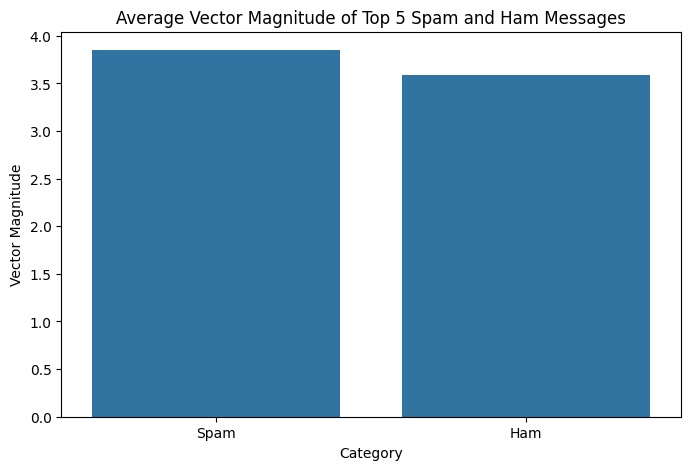

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Vector Magnitude', data=vector_df)
plt.title('Average Vector Magnitude of Top 5 Spam and Ham Messages')
plt.ylabel('Vector Magnitude')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer()
#top_spam_messages = df_raw[df_raw['label'] == 'spam'].head(5)['cleaned_message']
#top_ham_messages = df_raw[df_raw['label'] == 'ham'].head(5)['cleaned_message']

spam_vectors = vectorizer.fit_transform(top_spam_messages).toarray()
ham_vectors = vectorizer.fit_transform(top_ham_messages).toarray()

# Fit the vectorizer on all messages (spam and ham) to get a common vocabulary
top_spam_messages = pd.concat([df_raw[df_raw['label'] == 'spam'].head(5)['cleaned_message'],
                          df_raw[df_raw['label'] == 'ham'].head(5)['cleaned_message']])
vectorizer.fit(top_spam_messages)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfVectorizer()

In [ ]:
spam_vectors = vectorizer.transform(top_spam_messages).toarray()
ham_vectors = vectorizer.transform(top_ham_messages).toarray()

# Get feature names from the fitted vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create DataFrames, handling potential missing columns in ham_vectors
spam_df = pd.DataFrame(spam_vectors, columns=feature_names)
ham_df = pd.DataFrame(ham_vectors, columns=feature_names)


# Calculate average TF-IDF scores for spam and ham
avg_spam_tfidf = spam_df.mean(axis=0)
avg_ham_tfidf = ham_df.mean(axis=0)

# Get top 5 spam-specific tokens
top_spam_tokens = avg_spam_tfidf.sort_values(ascending=False).head(5).index.tolist()

# Get top 5 ham-specific tokens
top_ham_tokens = avg_ham_tfidf.sort_values(ascending=False).head(5).index.tolist()

# Combine top tokens and their average TF-IDF scores
top_tokens = top_spam_tokens + top_ham_tokens
top_tfidf_scores = pd.concat([avg_spam_tfidf[top_spam_tokens], avg_ham_tfidf[top_ham_tokens]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


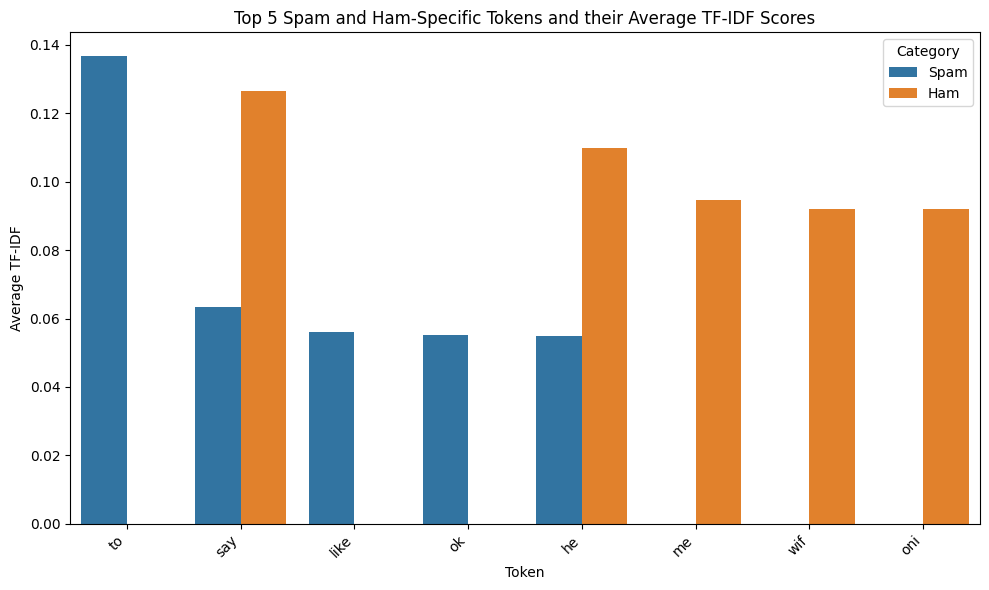

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'Token': top_tokens, 'Average TF-IDF': top_tfidf_scores.values,
                       'Category': ['Spam'] * 5 + ['Ham'] * 5})

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.barplot(x='Token', y='Average TF-IDF', hue='Category', data=plot_df)
plt.title('Top 5 Spam and Ham-Specific Tokens and their Average TF-IDF Scores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()